In [1]:
%load_ext autoreload
%autoreload 2

import os 
import sys

project_dir_path = '/home/onoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

print(sys.path)


from src.setup_problem_loss import Setup
from src.misc import visualize_result

import numpy as np
import pandas as pd
import cvxpy as cp

from sklearn.metrics import log_loss

from src.misc import *

['/home/onoue/ws/lukasiewicz_1/notebooks/toy_problem', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/onoue/ws/lukasiewicz_1/myenv/lib/python3.10/site-packages', '/home/onoue/ws/lukasiewicz_1']


In [2]:
data_dir_path = os.path.join(project_dir_path, "inputs/toy_data_loss")
data_dir_path

'/home/onoue/ws/lukasiewicz_1/inputs/toy_data_loss'

In [3]:
file_names_dict = {
    "supervised": ["L_p1", "L_p2", "L_p3"],
    "unsupervised": ["U"],
    "rule": ["rules"]
}

In [71]:
problem_instance = Setup(data_dir_path, file_names_dict)
problem_instance.load_data()
problem_instance.load_rules()
problem_instance.identify_predicates()

In [72]:
obj_func = problem_instance.construct_objective_function(2.5, 2.5)

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


In [73]:
tmp1.shape

()

In [74]:
tmp1 = np.random.rand(5)
tmp2 = cp.Variable(5)

print(tmp1 * tmp2)

[0.33636836 0.63474631 0.58647929 0.77559923 0.0314507 ] @ var11020


/home/onoue/ws/lukasiewicz_1/myenv/lib/python3.10/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


In [75]:
print(tmp1 @ tmp2)

[0.33636836 0.63474631 0.58647929 0.77559923 0.0314507 ] @ var11020


In [68]:
tmp2.shape

(5,)

In [10]:
problem_instance.L

{'p1': array([[ 0.1,  0.5, -1. ],
        [ 0.4,  0.4, -1. ],
        [ 0.3,  0.8,  1. ],
        [ 0.9,  0.7,  1. ]]),
 'p2': array([[ 0.1,  0.3, -1. ],
        [ 0.6,  0.4, -1. ],
        [ 0.2,  0.8,  1. ],
        [ 0.7,  0.6,  1. ]]),
 'p3': array([[ 0.4,  0.2, -1. ],
        [ 0.9,  0.3, -1. ],
        [ 0.2,  0.6,  1. ],
        [ 0.5,  0.7,  1. ]])}

In [29]:
from sklearn.metrics import log_loss

for p_name, p in problem_instance.predicates_dict.items():
    x = problem_instance.L[p_name][:, :-1]
    y = problem_instance.L[p_name][:, -1]

    print(x)
    print(y)
    print(p(x).shape)
    print(p(x).value)
    print(log_loss(y, p(x).value))



[[0.1 0.5]
 [0.4 0.4]
 [0.3 0.8]
 [0.9 0.7]]
[-1. -1.  1.  1.]
(4,)
[4.90968845e-06 5.11760995e-06 5.86704336e-06 6.50617924e-06]
5.997231986241477
[[0.1 0.3]
 [0.6 0.4]
 [0.2 0.8]
 [0.7 0.6]]
[-1. -1.  1.  1.]
(4,)
[8.09822149e-06 1.01109971e-05 1.00201723e-05 1.10833256e-05]
5.730249314547032
[[0.4 0.2]
 [0.9 0.3]
 [0.2 0.6]
 [0.5 0.7]]
[-1. -1.  1.  1.]
(4,)
[1.30266346e-05 1.62101182e-05 1.36813995e-05 1.57667768e-05]
5.564277036942052


In [16]:
np.zeros((3, 4)) + 1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [35]:
y_true = np.array([1, 0, 1, 1, 0])
y_pred_var = cp.Variable(5, nonneg=True)

In [60]:
tmp = cp.Variable((5,4), nonneg=True) 
tmp

Variable((5, 4), nonneg=True)

In [63]:
tmp * 5

Expression(AFFINE, NONNEGATIVE, (5, 4))

In [42]:
tmp = []

for i in range(5):
    yt = y_true[i]
    yp = y_pred_var[i]
    tmp.append(yt * yp)

for i in range(5):
    print(tmp[i])

1.0 @ var10546[0]
0.0 @ var10546[1]
1.0 @ var10546[2]
1.0 @ var10546[3]
0.0 @ var10546[4]


In [39]:
np.mean(tmp)

Expression(AFFINE, NONNEGATIVE, ())

In [43]:
print(np.mean(tmp))

(1.0 @ var10546[0] + 0.0 @ var10546[1] + 1.0 @ var10546[2] + 1.0 @ var10546[3] + 0.0 @ var10546[4]) / 5.0


In [47]:
tmp = np.array([-1, 1, 1, 1, 1, -1, -1])
np.where(tmp == -1, 0, tmp)

array([0, 1, 1, 1, 1, 0, 0])

In [4]:
# file_names_dict = {
#     "supervised": ["L_p1(x)", "L_p2(x)", "L_p3(x)"],
#     "unsupervised": ["U"],
#     "rule": ["rules"]
# }

# data_dir_path = './../../inputs/toy_data'


problem_instance = Setup(data_dir_path, file_names_dict)
objective, constraints = problem_instance.main(c1=10, c2=10)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

Loading data ...
Done in 0.010417461395263672 seconds! 

Loading rules ...
Done in 0.00014066696166992188 seconds! 

Identifying predicates ...
Done in 0.00031638145446777344 seconds! 

Constructing objective function ...
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
Done in 0.0022389888763427734 seconds! 

Constructing constraints ...
Done in 0.01513671875 seconds! 

All done
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 26 11:29:13 AM: Your problem has 11 variables, 84 constraints, and 0 parameters.


(CVXPY) Nov 26 11:29:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 26 11:29:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 26 11:29:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 26 11:29:13 AM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 26 11:29:13 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Nov 26 11:29:13 AM: Applying reduction Dcp2Cone
(CVXPY) Nov 26 11:29:13 AM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 26 11:29:14 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Nov 26 11:29:14 AM: Applying reduction ECOS
(CVXPY) No

/home/onoue/ws/lukasiewicz_1/myenv/lib/python3.10/site-packages/cvxpy/atoms/elementwise/log.py:35: RuntimeWarning: invalid value encountered in log
  return np.log(values[0])


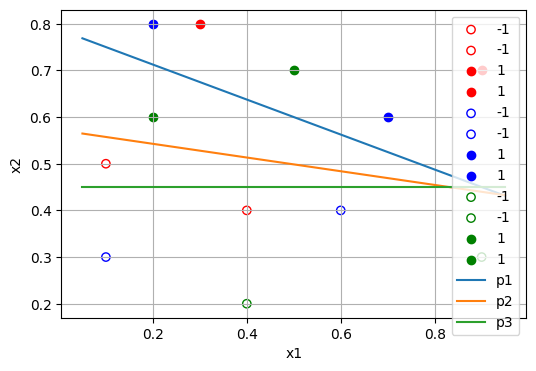

In [5]:
visualize_result(problem_instance)

In [13]:
def test_trained_predicate(predicates_dict, test_data_dict):
    result_dict = {}
    p_names = predicates_dict.keys()

    for p_name in p_names:
        pred_vals = []
        preds = []

        p = predicates_dict[p_name]
        test_data = test_data_dict[p_name]

        cnt = 0

        for data in test_data:
            x, ans = data[:-1], data[-1]
            pred_val = p(x).value
            pred_vals.append(pred_val)

            if (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1):
                cnt += 1

            pred = (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1)
            preds.append(pred)

        p_arr = np.hstack([test_data, 
                           np.array(pred_vals).reshape(-1,1), 
                           np.array(preds).reshape(-1, 1)])

        result_dict[p_name] = p_arr

        print(cnt)
        print(f'Accuracy of {p_name}: {cnt / len(test_data)}')

    return result_dict

In [7]:
problem_instance.predicates_dict

{'p1(x)': <src.misc.Predicate at 0x7f434f9c7250>,
 'p2(x)': <src.misc.Predicate at 0x7f434f1cbe90>,
 'p3(x)': <src.misc.Predicate at 0x7f434f1e8190>}

In [8]:
problem_instance.L

{'p1(x)': array([[ 0.1,  0.5, -1. ],
        [ 0.4,  0.4, -1. ],
        [ 0.3,  0.8,  1. ],
        [ 0.9,  0.7,  1. ]]),
 'p2(x)': array([[ 0.1,  0.3, -1. ],
        [ 0.6,  0.4, -1. ],
        [ 0.2,  0.8,  1. ],
        [ 0.7,  0.6,  1. ]]),
 'p3(x)': array([[ 0.4,  0.2, -1. ],
        [ 0.9,  0.3, -1. ],
        [ 0.2,  0.6,  1. ],
        [ 0.5,  0.7,  1. ]])}

In [15]:
p_dict = problem_instance.predicates_dict
test_data = problem_instance.L

res_dict = test_trained_predicate(p_dict, test_data)

4
Accuracy of p1(x): 1.0
4
Accuracy of p2(x): 1.0
4
Accuracy of p3(x): 1.0


In [17]:
pd.DataFrame(res_dict['p1(x)'])

,0,1,2,3,4
0,0.1,0.5,-1.0,1.046663e-10,1.0
1,0.4,0.4,-1.0,2.500000e-02,1.0
2,0.3,0.8,1.0,7.500000e-01,1.0
3,0.9,0.7,1.0,1.000000e+00,1.0


In [41]:
cnt = 0
cnt_violation = 0

for data in problem_instance.S:
    for x in data:
        val = problem_instance.predicates_dict['p_1(x)'](x).value

        if val < 0:
            cnt_violation += 1
        print(val)

        cnt += 1

print(f'\n violations: {cnt_violation} out of {cnt}')

1.8977408533515927e-10
0.02202231900646834
0.496573718191177
0.672043493676458
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.26285027551401136
0.12432062345219297
0.4454245659683146
0.43832005137884067
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.2408279566973171
0.14634294226888722
0.1825742902645291
0.46744688478500873
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503

 violations: 2 out of 30
